In [1]:
pwd

'/Users/aidasaglinskas/Desktop/BC-FacExpr-1.2-fMRI-mainExp'

In [2]:
#skvideo.setFFmpegPath("/Users/aidasaglinskas/Desktop/test/")

In [3]:
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance,ImageStat
import skvideo
import skvideo.io
import numpy as np
import os
from tqdm import tqdm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
def load_video(fn):
    videodata = skvideo.io.vread(fn)
    return videodata

In [5]:
def safe_mkdir(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

In [6]:
def brighten_video(videodata,factor=1):
    return np.array([np.array(ImageEnhance.Brightness(Image.fromarray(videodata[frame,:,:,:])).enhance(factor)) for frame in range(videodata.shape[0])])

In [7]:
def contrast_video(videodata,factor=1):
    return np.array([np.array(ImageEnhance.Contrast(Image.fromarray(videodata[frame,:,:,:])).enhance(factor)) for frame in range(videodata.shape[0])])

In [8]:
def save_video(videodata,ofn='outvideo.mp4'):
    #skvideo.io.vwrite(ofn, videodata.astype(np.uint8),outputdict={'-codec': 'h264', '-filter:v' : 'fps=29.97'})
    skvideo.io.vwrite(ofn, videodata.astype(np.uint8))

In [9]:
def make_ref(ctargets):
    ref = np.ones((10,10,3))
    for i in range(3):
        ref[:,:,i] = ref[:,:,i] * ctargets[i]
    return ref.astype(np.uint8)

In [10]:
def get_face(frame,l=50):
    return frame[256-l:256+l,256-l:256+l,:]

In [11]:
def get_mean_rbg(frame):
    return frame.mean(axis=0).mean(axis=0)

In [12]:
def tint_frame_face(frame,ctargets):
    
    face_square = get_face(frame)
    diff = get_mean_rbg(face_square)-ctargets
    frame_copy = frame.astype(np.float64)
    for i in range(3):
        frame_copy[:,:,i] = frame_copy[:,:,i] - diff[i]
        frame_copy[frame_copy<0]=0
        frame_copy[frame_copy>255]=255
        
    frame_copy = frame_copy.astype(np.uint8)
    return frame_copy

In [13]:
def tint_video_face(videodata,ctargets):
    nframes = videodata.shape[0]
    tinted_video = np.array([tint_frame_face(videodata[i,:,:,:],ctargets) for i in range(nframes)])
    return tinted_video

In [14]:
def tint_frame(frame,ctargets):
    
    #face_square = get_face(frame)
    diff = get_mean_rbg(frame)-ctargets
    frame_copy = frame.astype(np.float64)
    for i in range(3):
        frame_copy[:,:,i] = frame_copy[:,:,i] - diff[i]
        frame_copy[frame_copy<0]=0
        frame_copy[frame_copy>255]=255
        
    frame_copy = frame_copy.astype(np.uint8)
    return frame_copy

In [15]:
def tint_video(videodata,ctargets):
    nframes = videodata.shape[0]
    tinted_video = np.array([tint_frame(videodata[i,:,:,:],ctargets) for i in range(nframes)])
    return tinted_video

In [16]:
def get_contrast(frame):
    return frame.mean(axis=-1).std().round(2)

def get_brightness(frame):
    return frame.mean().round(2)

In [17]:
indir = './stimuli_cropped/'
files = [os.path.join(indir,file) for file in os.listdir(indir) if file.endswith('.mp4')]
files.sort()
print(len(files))
files[0:5]

70


['./stimuli_cropped/id1d1.mp4',
 './stimuli_cropped/id1d2.mp4',
 './stimuli_cropped/id1f1.mp4',
 './stimuli_cropped/id1f2.mp4',
 './stimuli_cropped/id1h1.mp4']

In [20]:
all_contrast = []
all_brightness = []
all_rbg = []

for f in tqdm(range(len(files))):
    video_data = load_video(files[f])
    n = video_data.shape[0]

    all_contrast.append( get_contrast(video_data[0,:,:,:]) )
    all_brightness.append( get_brightness(video_data[0,:,:,:]) )
    all_rbg.append( get_mean_rbg(video_data[0,:,:,:]) )
    
all_contrast = np.array(all_contrast)
all_brightness = np.array(all_brightness)
all_rbg = np.array(all_rbg)

100%|███████████████████████████████████████████| 70/70 [00:08<00:00,  7.82it/s]


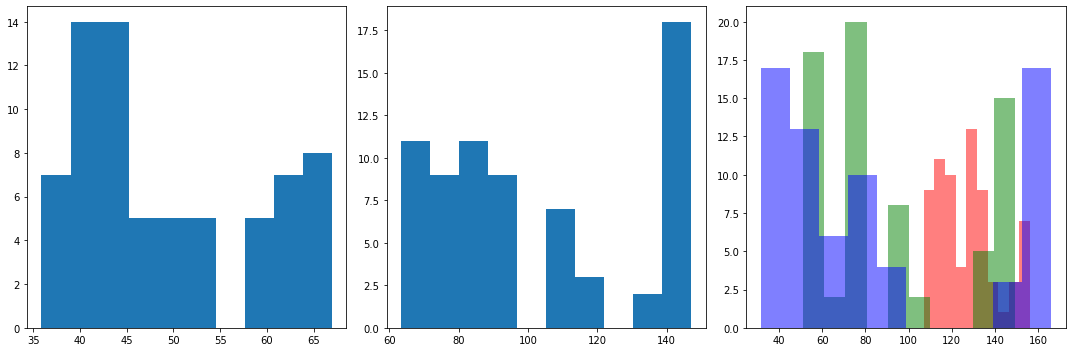

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(all_contrast)
plt.subplot(1,3,2)
plt.hist(all_brightness)
plt.subplot(1,3,3)
plt.hist(all_rbg[:,0],color='r',alpha=.5)
plt.hist(all_rbg[:,1],color='g',alpha=.5)
plt.hist(all_rbg[:,2],color='b',alpha=.5)

plt.tight_layout()

In [22]:
all_rbg.mean(axis=0).astype(int)

array([127,  92,  85])

In [23]:
all_contrast.mean().astype(int)

49

In [24]:
all_brightness.mean().astype(int)

101

In [25]:
# ##### CALCULATE

# hist_brightness = []
# hist_contrast = []
# hist_r = []
# hist_g = []
# hist_b = []
# for file in tqdm(files):
#     vid = load_video(file)
    
#     #hist_brightness.append(  vid[0,:,:,:].mean()  )
#     #hist_contrast.append(  vid[0,:,:,:].mean(axis=-1).std() )
    
#     hist_brightness.append(  get_face(vid[0,:,:,:]).mean()  )
#     hist_contrast.append(  get_face(vid[0,:,:,:]).mean(axis=-1).std() )
    
#     hist_r.append( vid[:,:,:,0].mean() )
#     hist_g.append( vid[:,:,:,1].mean() )
#     hist_b.append( vid[:,:,:,2].mean() )
    
    
# l = 50
# face_squares = np.array([load_video(files[i])[0,:,:,:][256-l:256+l,256-l:256+l,:] for i in tqdm(range(len(files))) ])

# ##### PLOT

# brightness_target = np.array(hist_brightness).mean().round(3)

# contrast_target = np.array(hist_contrast).mean().round(3)

# target_r = np.array(hist_r).mean().round(3)
# target_g = np.array(hist_g).mean().round(3)
# target_b = np.array(hist_b).mean().round(3)

# ctargets = face_squares.mean(axis=0).mean(axis=0).mean(axis=0)
# ctargets


# plt.figure(figsize=(20,5))
# plt.subplot(1,4,1)
# plt.hist(hist_brightness);
# plt.title(f'brightness M = {brightness_target.astype(int)}');
# plt.subplot(1,4,2)
# plt.hist(hist_contrast);
# plt.title(f'contrast M = {contrast_target.astype(int)}');
# plt.subplot(1,4,3)
# plt.hist(hist_r,color='r',alpha=.5);
# plt.hist(hist_g,color='g',alpha=.5);
# plt.hist(hist_b,color='b',alpha=.5);
# plt.title(f'frame hist M = {target_r.astype(int)} {target_g.astype(int)} {target_b.astype(int)}');

# plt.subplot(1,4,4)
# plt.hist( face_squares.mean(axis=1).mean(axis=1)[:,0],color='r',alpha=.5)
# plt.hist( face_squares.mean(axis=1).mean(axis=1)[:,1],color='g',alpha=.5)
# plt.hist( face_squares.mean(axis=1).mean(axis=1)[:,2],color='b',alpha=.5)
# plt.title(f'Faces hist M = {ctargets[0].astype(int)} {ctargets[1].astype(int)} {ctargets[2].astype(int)}');

In [26]:
# contrast_target = 50
# brightness_target = 75
# for i in range(25):
#     contrast = get_face(videodata[0,:,:,:]).mean(axis=-1).std()
#     brightness = get_face(videodata[0,:,:,:]).mean()

#     videodata = contrast_video(videodata,contrast_target/contrast)
#     videodata = brighten_video(videodata,brightness_target/brightness)

In [27]:
# contrast_target = 50
# brightness_target = 75

In [28]:
# contrast_target = 50
# brightness_target = 100
# ctargets = np.array([100,80,80])

In [29]:
# contrast_target = 50
# brightness_target = 100
# ctargets = np.array([120,80,80])

In [18]:
contrast_target = 50
brightness_target = 125
ctargets = np.array([125,90,85])

In [213]:
# contrast_target = 50
# # brightness_target = 115
# # ctargets = np.array([100,80,80])contrast_target = 50
# brightness_target = 125
# ctargets = np.array([127,92,85])

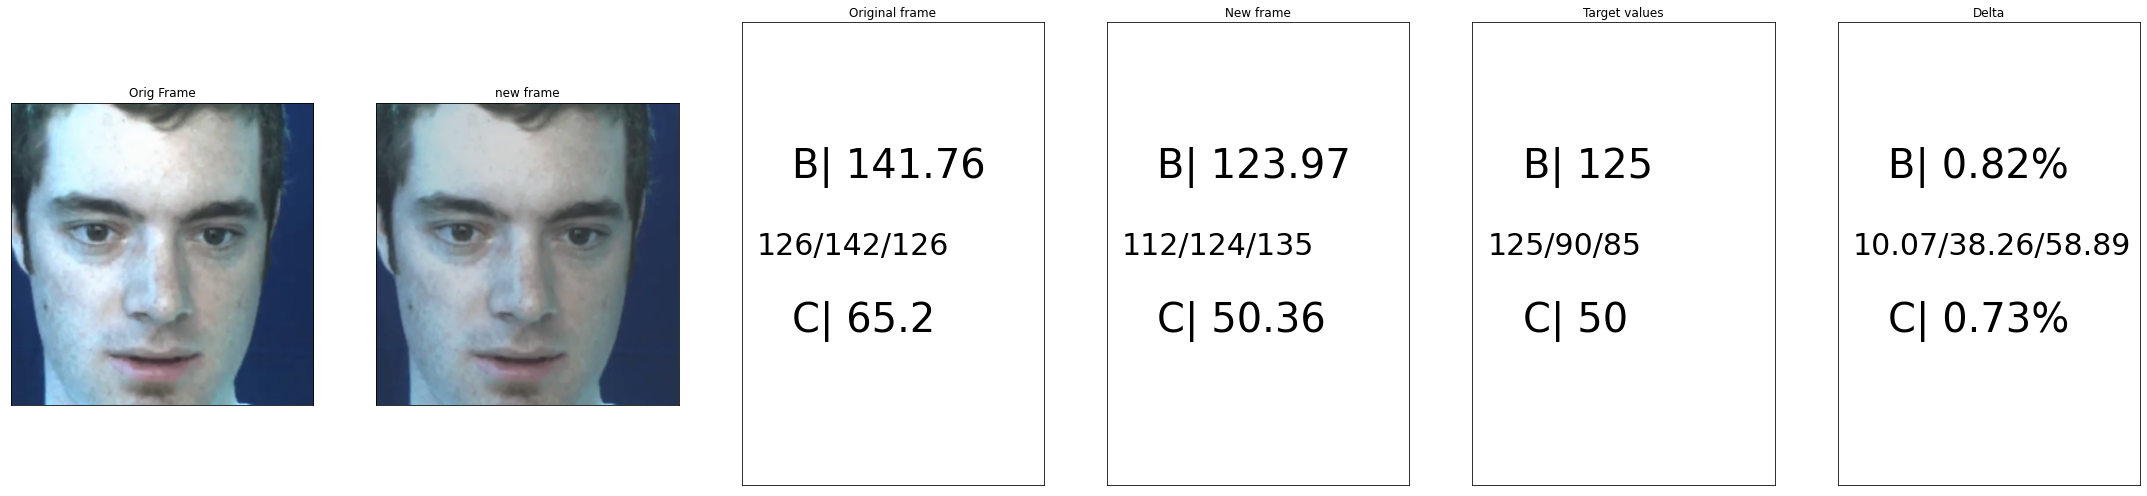

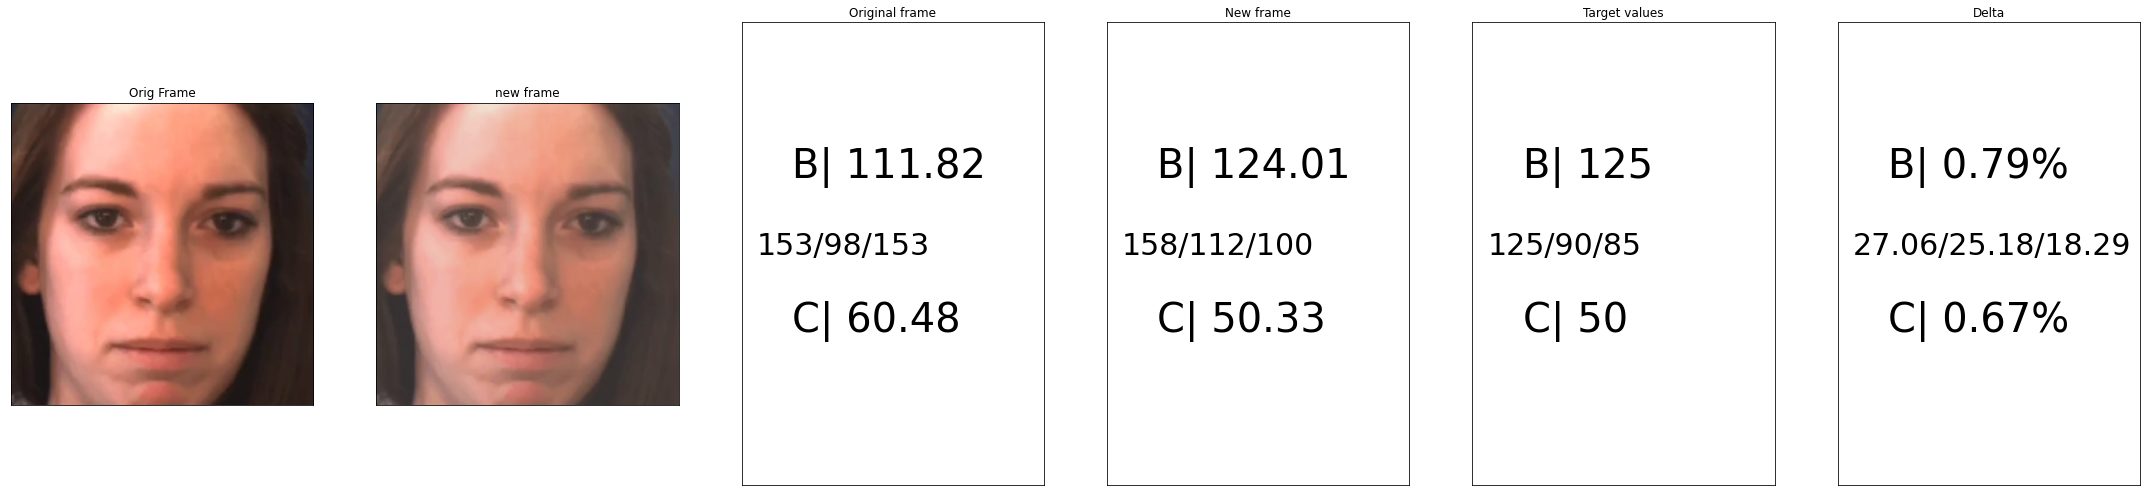

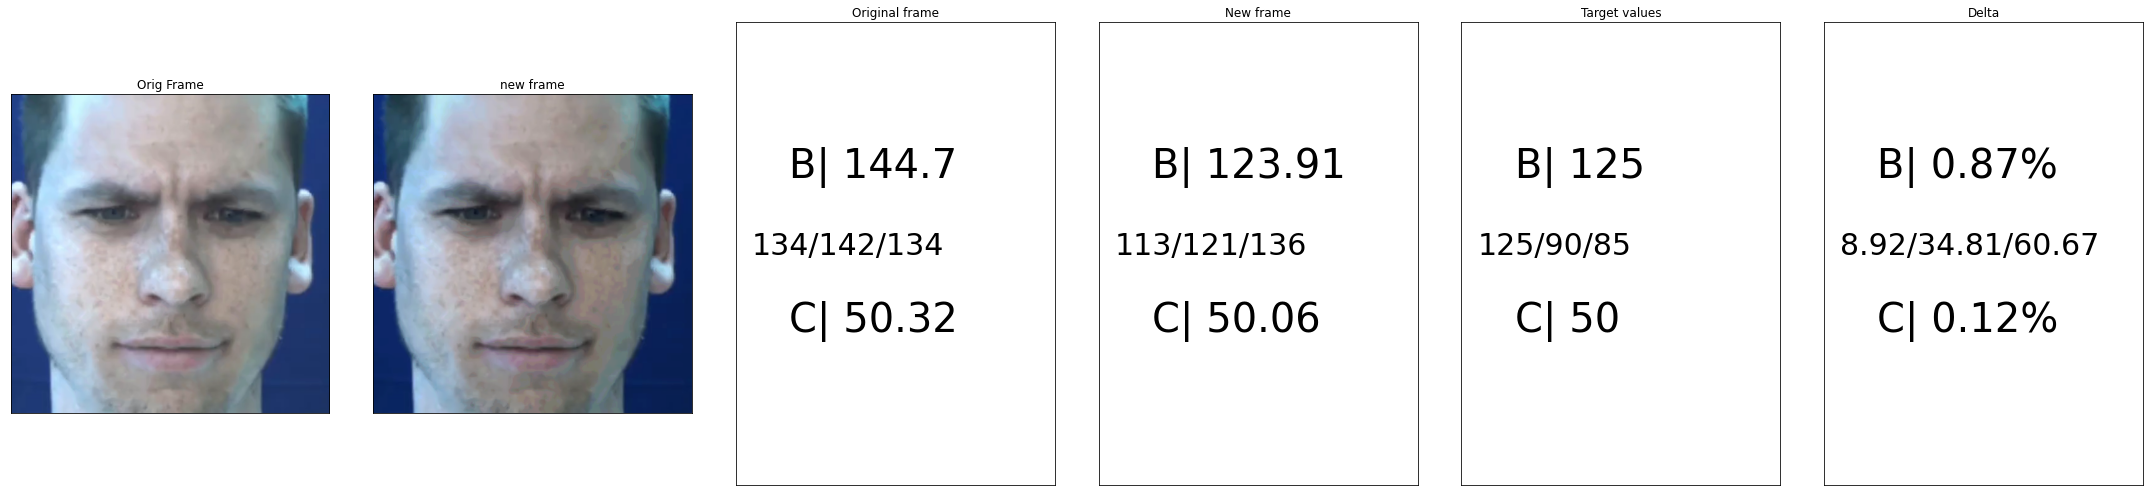

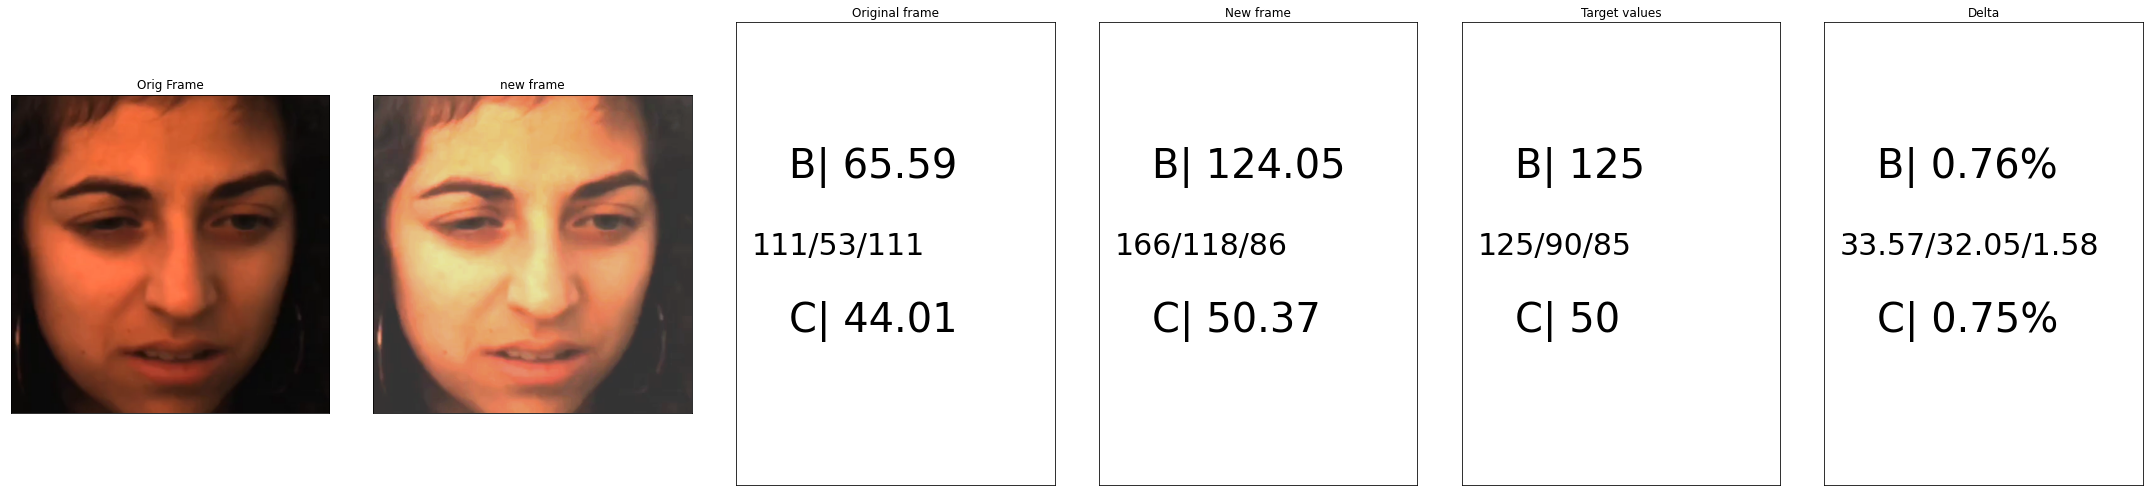

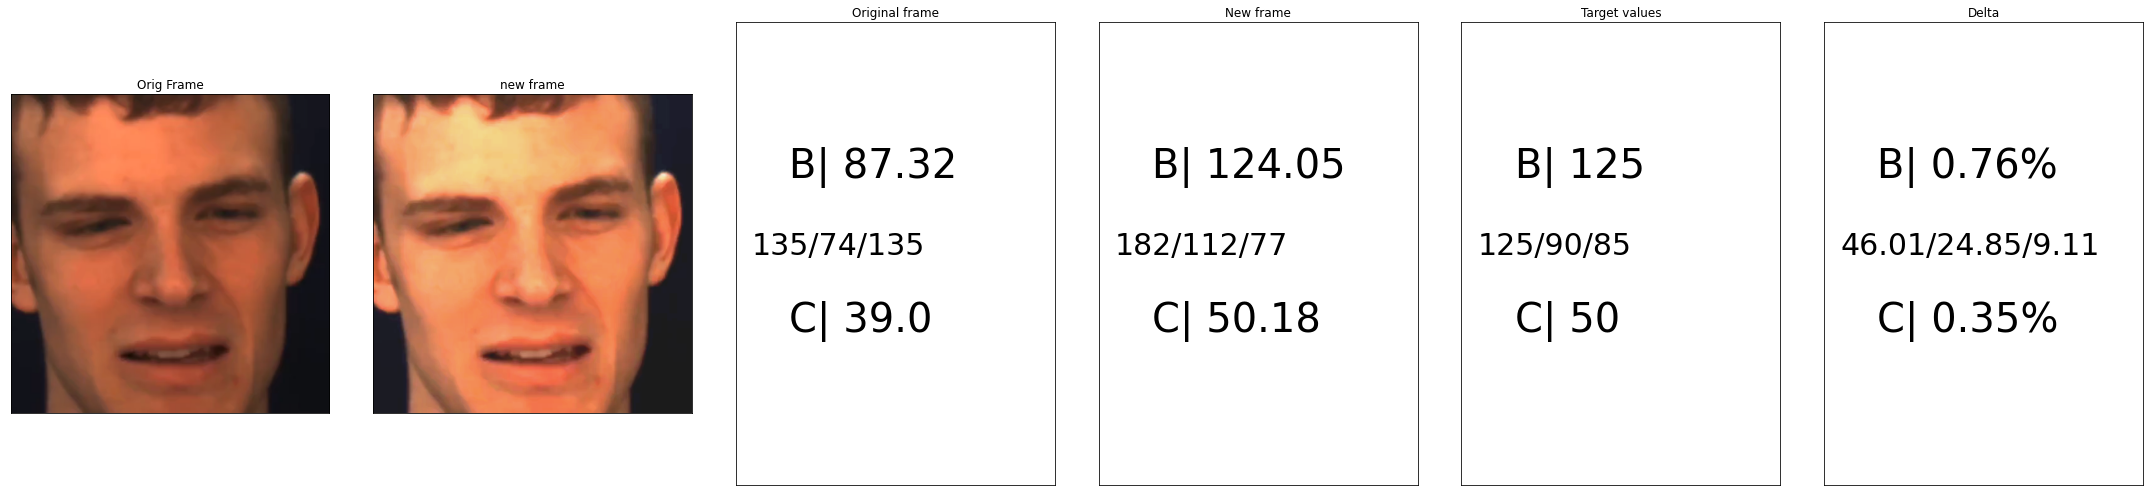

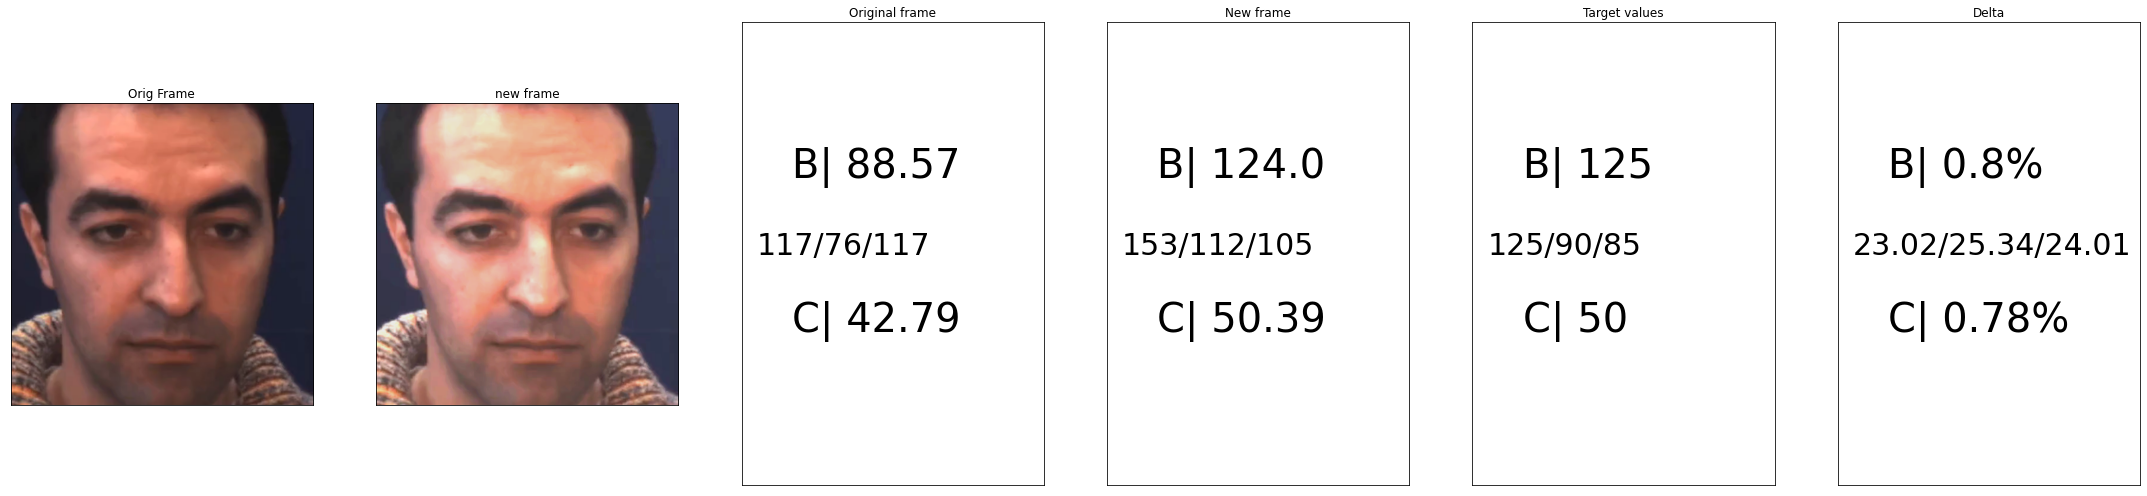

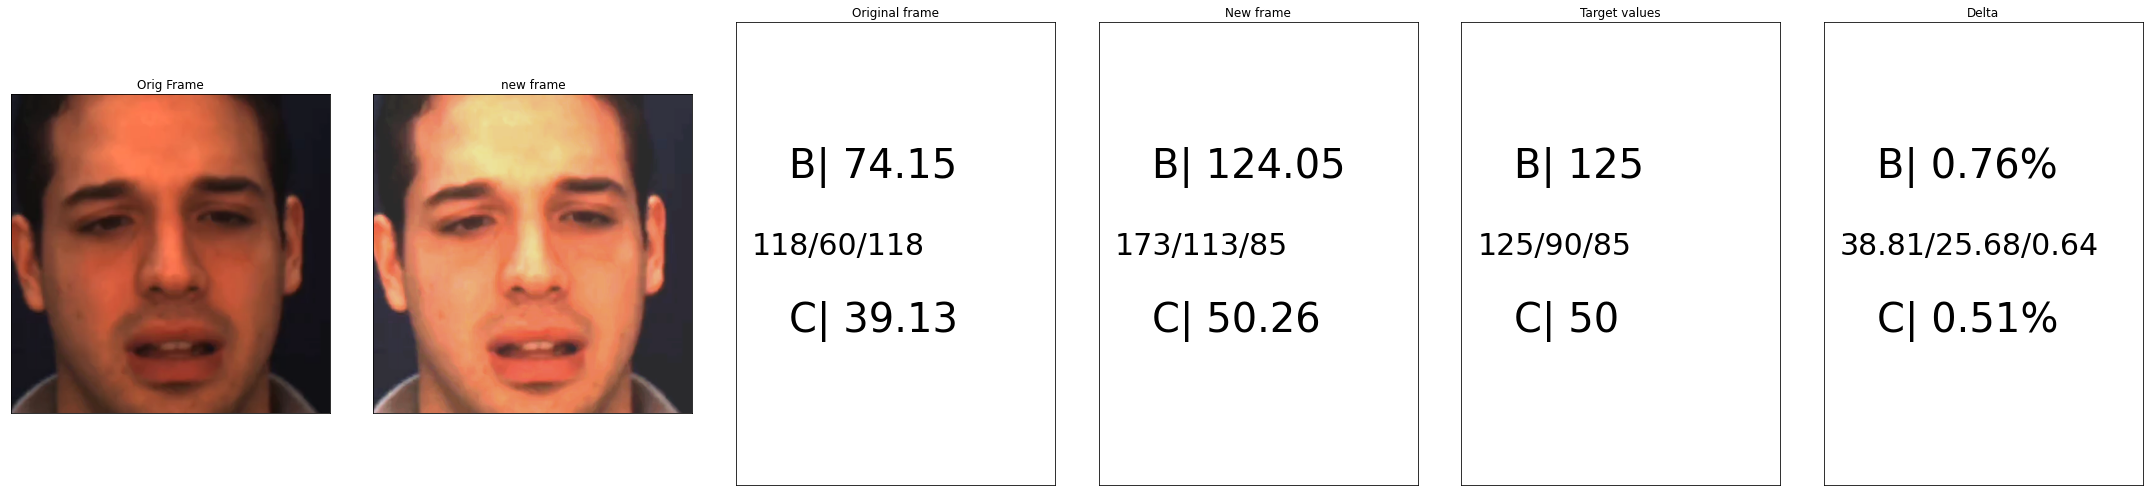

In [24]:
run_norm = True
do_plot = True

ofdir = './stimuli_normed_cb/'
safe_mkdir(ofdir)


if run_norm:
    for f in np.arange(0,70,10):
    #for f in [0]:
    #for f in tqdm(range(len(files))):
        #print(ctargets)
        fn = files[f]
        videodata = load_video(fn)
        frame = videodata[0,:,:,:]
        
        #face_square = get_face(frame)
        #face_ref = make_ref(get_mean_rbg(face_square))

        
        #videodata = tint_video(videodata,ctargets)
        
        for i in range(25):        
            contrast = videodata[0,:,:,:].mean(axis=-1).std()
            brightness = videodata[0,:,:,:].mean()

            videodata = contrast_video(videodata,contrast_target/contrast)
            videodata = brighten_video(videodata,brightness_target/brightness)
            
        
        contrast = videodata[0,:,:,:].mean(axis=-1).std()
        brightness = videodata[0,:,:,:].mean()
        
        #save_video(videodata,fn.replace(indir,ofdir))
        #videodata = tint_video_face(videodata,ctargets)

        #save_video(videodata,fn.replace(indir,ofdir))

        frame_copy = videodata[0,:,:,:]

        #frame_copy = tint_frame_face(frame,ctargets)
        #new_face = get_face(frame_copy)
        #new_face_ref = make_ref(get_mean_rbg(new_face))
        #print(ctargets)
        #do_plot = False
        if do_plot:
            ncols = 7
            plt.figure(figsize=(5*ncols,ncols));i=0;
            i+=1;plt.subplot(1,ncols,i);plt.imshow(frame);plt.xticks([]);plt.yticks([]);plt.title('Orig Frame');
            i+=1;plt.subplot(1,ncols,i);plt.imshow(frame_copy);plt.xticks([]);plt.yticks([]);plt.title('new frame');

            #i+=1;plt.subplot(1,ncols,i);plt.imshow(face_square);plt.xticks([]);plt.yticks([]);plt.title('Orig Face');
            #i+=1;plt.subplot(1,ncols,i);plt.imshow(new_face);plt.xticks([]);plt.yticks([]);plt.title('New Face');


            fontsize=40
            i+=1;plt.subplot(1,ncols,i);
            #plt.text(.5,1,f'C| {get_contrast(get_face(frame))}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            #plt.text(.5,2,f'B| {get_brightness(get_face(frame))}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.text(.5,1,f'C| {get_contrast(frame)}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.text(.5,2,f'B| {get_brightness(frame)}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);

            old_c = get_mean_rbg(frame).astype(np.uint8)
            plt.text(.15,1.5,f'{old_c[0]}/{old_c[1]}/{old_c[0]}',fontsize=fontsize*.75);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);

            plt.title('Original frame')


            i+=1;plt.subplot(1,ncols,i);
            #plt.text(.5,1,f'C| {get_contrast(get_face(videodata[0,:,:,:]))}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            #plt.text(.5,2,f'B| {get_brightness(get_face(videodata[0,:,:,:]))}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.text(.5,1,f'C| {get_contrast(videodata[0,:,:,:])}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.text(.5,2,f'B| {get_brightness(videodata[0,:,:,:])}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);        
            new_c = get_mean_rbg(videodata[0,:,:,:]).astype(np.uint8)
            plt.text(.15,1.5,f'{new_c[0]}/{new_c[1]}/{new_c[2]}',fontsize=fontsize*.75);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);

            plt.title('New frame')

            i+=1;plt.subplot(1,ncols,i);
            plt.text(.5,1,f'C| {contrast_target}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.text(.5,2,f'B| {brightness_target}',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.text(.15,1.5,f'{ctargets[0]}/{ctargets[1]}/{ctargets[2]}',fontsize=fontsize*.75);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.title('Target values')

            i+=1;plt.subplot(1,ncols,i);
            delta_c = (abs(contrast_target-contrast)/contrast_target*100).round(2)
            delta_b = (abs(brightness_target-brightness)/brightness_target*100).round(2)
            
            rgb = get_mean_rbg(videodata[0,:,:,:])
            delta_t_r = (abs(ctargets[0]-rgb[0])/ctargets[0]*100).round(2)
            delta_t_g = (abs(ctargets[1]-rgb[1])/ctargets[1]*100).round(2)
            delta_t_b = (abs(ctargets[2]-rgb[2])/ctargets[2]*100).round(2)
            
            plt.text(.5,1,f'C| {delta_c}%',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.text(.5,2,f'B| {delta_b}%',fontsize=fontsize);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.text(.15,1.5,f'{delta_t_r}/{delta_t_g}/{delta_t_b}',fontsize=fontsize*.75);plt.xlim(0,3);plt.ylim(0,3);plt.xticks([]);plt.yticks([]);
            plt.title('Delta')

            plt.tight_layout()
            plt.show()

In [ ]:
# #### DEFINE 

# indir = './stimuli_normed_cb/'
# files = [os.path.join(indir,file) for file in os.listdir(indir) if file.endswith('.mp4')]
# files.sort()
# files[0:5]

# ##### CALCULATE

# hist_brightness = []
# hist_contrast = []
# hist_r = []
# hist_g = []
# hist_b = []
# for file in tqdm(files):
#     vid = load_video(file)
    
#     hist_brightness.append(  vid[0,:,:,:].mean()  )
#     hist_contrast.append(  vid[0,:,:,:].mean(axis=-1).std() )
    
#     hist_r.append( vid[:,:,:,0].mean() )
#     hist_g.append( vid[:,:,:,1].mean() )
#     hist_b.append( vid[:,:,:,2].mean() )
    
    
# l = 50
# face_squares = np.array([load_video(files[i])[0,:,:,:][256-l:256+l,256-l:256+l,:] for i in tqdm(range(len(files))) ])

# ##### PLOT

# brightness_target = np.array(hist_brightness).mean().round(3)

# contrast_target = np.array(hist_contrast).mean().round(3)

# target_r = np.array(hist_r).mean().round(3)
# target_g = np.array(hist_g).mean().round(3)
# target_b = np.array(hist_b).mean().round(3)

# ctargets = face_squares.mean(axis=0).mean(axis=0).mean(axis=0)
# ctargets


# plt.figure(figsize=(20,10))
# plt.subplot(2,3,1)
# plt.hist(hist_brightness);
# plt.title(f'brightness M = {brightness_target.astype(int)}');
# plt.subplot(2,3,2)
# plt.hist(hist_contrast);
# plt.title(f'contrast M = {contrast_target.astype(int)}');
# plt.subplot(2,3,3)
# plt.hist(hist_r,color='r',alpha=.5);
# plt.hist(hist_g,color='g',alpha=.5);
# plt.hist(hist_b,color='b',alpha=.5);
# plt.title(f'frame hist M = {target_r.astype(int)} {target_g.astype(int)} {target_b.astype(int)}');


# plt.subplot(2,3,4)
# face_brightness = np.array([face_squares[i,:,:,:].mean() for i in range(face_squares.shape[0])])
# plt.hist(face_brightness)
# plt.title(f'face brightness M = {face_brightness.mean().astype(int)}');

# plt.subplot(2,3,5)
# face_contrast = np.array([face_squares[i,:,:,:].mean(axis=-1).std() for i in range(face_squares.shape[0])])
# plt.hist(face_contrast)
# plt.title(f'face contrast M = {face_contrast.mean().astype(int)}');


# plt.subplot(2,3,6)
# plt.hist( face_squares.mean(axis=1).mean(axis=1)[:,0],color='r',alpha=.5)
# plt.hist( face_squares.mean(axis=1).mean(axis=1)[:,1],color='g',alpha=.5)
# plt.hist( face_squares.mean(axis=1).mean(axis=1)[:,2],color='b',alpha=.5)
# plt.title(f'Faces hist M = {ctargets[0].astype(int)} {ctargets[1].astype(int)} {ctargets[2].astype(int)}');

In [ ]:
#import cv2

In [ ]:
# def return_frame(image_fn,enlarge=0):
    
#     trained_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#     img = cv2.imread(image_fn)
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     face_cordinates = trained_data.detectMultiScale(gray_img)
#     face_cordinates = face_cordinates + [-enlarge,-enlarge,enlarge*2,enlarge*2]
    
#     return face_cordinates

In [44]:
indir = './stimuli_normed_cb/'
files = [os.path.join(indir,file) for file in os.listdir(indir) if file.endswith('.mp4')]
files.sort()
n = len(files)
print(n)
files[0:5]

70


['./stimuli_normed_cb/id1d1.mp4',
 './stimuli_normed_cb/id1d2.mp4',
 './stimuli_normed_cb/id1f1.mp4',
 './stimuli_normed_cb/id1f2.mp4',
 './stimuli_normed_cb/id1h1.mp4']

In [34]:
all_contrast = []
all_brightness = []
all_rbg = []

for f in tqdm(range(len(files))):
    video_data = load_video(files[f])
    n = video_data.shape[0]

    all_contrast.append( get_contrast(video_data[0,:,:,:]) )
    all_brightness.append( get_brightness(video_data[0,:,:,:]) )
    all_rbg.append( get_mean_rbg(video_data[0,:,:,:]) )
    
all_contrast = np.array(all_contrast)
all_brightness = np.array(all_brightness)
all_rbg = np.array(all_rbg)

100%|███████████████████████████████████████████| 70/70 [00:09<00:00,  7.61it/s]


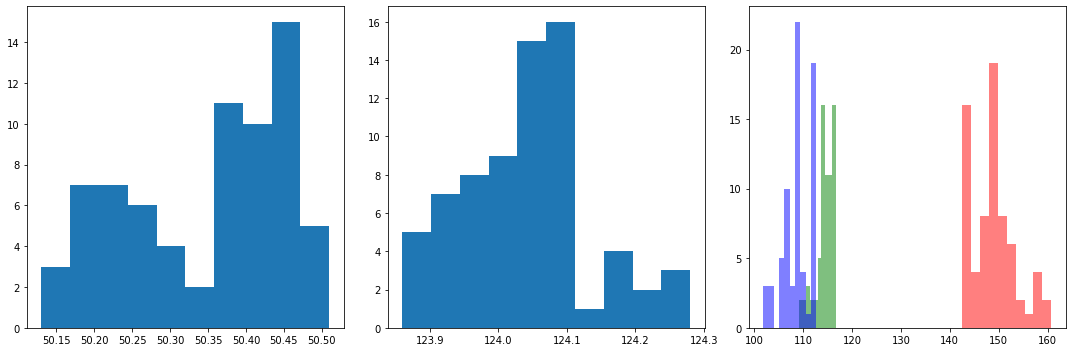

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(all_contrast)
plt.subplot(1,3,2)
plt.hist(all_brightness)
plt.subplot(1,3,3)
plt.hist(all_rbg[:,0],color='r',alpha=.5)
plt.hist(all_rbg[:,1],color='g',alpha=.5)
plt.hist(all_rbg[:,2],color='b',alpha=.5)

plt.tight_layout()

In [56]:
from scipy.cluster.hierarchy import linkage,dendrogram

def get_triu(inMat):
    #inMat = rdm_bg

    assert np.ndim(inMat)==2, 'not 2 dim, wtf'
    assert inMat.shape[0]==inMat.shape[1], 'not a square'

    n = inMat.shape[0]
    triu_vec = inMat[np.triu_indices(n=n,k=1)]

    #assert (squareform(triu_vec)==inMat).sum()/(n**2)>.9, 'unfaithful triu'
    return triu_vec

In [71]:
frame_sim = np.corrcoef(np.array([load_video(file)[0,:,:,:].mean(axis=-1).flatten()[::10] for file in tqdm(files)]))

100%|███████████████████████████████████████████| 70/70 [00:09<00:00,  7.44it/s]


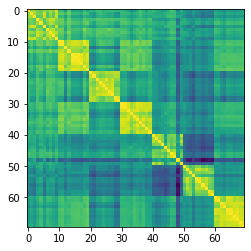

In [72]:
plt.imshow(frame_sim)

In [42]:
rgbs = np.array([get_mean_rbg(load_video(file)[0,:,:,:]) for file in files])

In [53]:
for i in range(n):
    for j in range(n):
        rgb_dist[i,j] = np.linalg.norm(rgbs[i,:]-rgbs[j,:])

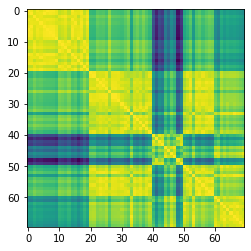

In [55]:
plt.imshow(1-rgb_dist)

In [75]:
np.corrcoef(get_triu(frame_sim),get_triu(1-rgb_dist))

array([[1.       , 0.3239331],
       [0.3239331, 1.       ]])

In [ ]:
#########
######### PADDING
#########

In [76]:
def pad_frame(img_face,pad_amount=100):
    arr = np.array([np.pad(img_face[:,:,0], (pad_amount, pad_amount), mode='constant'),
    np.pad(img_face[:,:,1], (pad_amount, pad_amount), mode='constant'),
    np.pad(img_face[:,:,2], (pad_amount, pad_amount), mode='constant'),])
    arr = np.swapaxes(arr,0,1)
    arr = np.swapaxes(arr,1,2)
    return arr

In [95]:
def resize_video(video_data,vid_size_target=(512,512)):
    from PIL import Image, ImageEnhance,ImageStat
    import numpy as np
    
    #vid_size_target = np.array((512,512))
    vid_size_target = np.array(vid_size_target)
    vid_size = np.array((video_data.shape[1],video_data.shape[2]))
    nframes = video_data.shape[0]
    nchannels = video_data.shape[-1]
    video_data_new = np.zeros((nframes,vid_size_target[0],vid_size_target[1],nchannels))
    for f in range(nframes):
        video_data_new[f,:,:,:] = np.array(Image.fromarray(video_data[f,:,:,:]).resize(vid_size_target,Image.ANTIALIAS))

    return video_data_new

In [99]:
def pad_video(video_data,pad_amount=250,vid_size_target=(512,512)):
    video_data_padded = np.array([pad_frame(video_data[f,:,:,:],pad_amount=pad_amount) for f in range(video_data.shape[0])])
    video_data_padded_resized = resize_video(video_data_padded,vid_size_target=vid_size_target)
    return video_data_padded_resized

In [125]:
ofdir = './stimuli_normed_cb_rand_crop'
safe_mkdir(ofdir)


#infn = files[0]
for infn in tqdm(files):
    video_data = load_video(infn)

    for pad in np.arange(0,251,50):
        ofn = infn.replace('./stimuli_normed_cb',ofdir).replace('.mp4',f'_c{pad}.mp4')
        video_data_padded = pad_video(video_data,pad_amount=pad,vid_size_target=(512,512))
        save_video(video_data_padded,ofn)

100%|███████████████████████████████████████████| 70/70 [10:00<00:00,  8.58s/it]


In [132]:
ofdir = './stimuli_normed_cb_rand_crop'
files = [os.path.join(ofdir,file) for file in os.listdir(ofdir) if file.endswith('.mp4')]
files.sort()
n = len(files)
print(n)
files[0:5]

420


['./stimuli_normed_cb_rand_crop/id1d1_c0.mp4',
 './stimuli_normed_cb_rand_crop/id1d1_c100.mp4',
 './stimuli_normed_cb_rand_crop/id1d1_c150.mp4',
 './stimuli_normed_cb_rand_crop/id1d1_c200.mp4',
 './stimuli_normed_cb_rand_crop/id1d1_c250.mp4']

In [142]:
data = np.array([load_video(file)[0,:,:,:].mean(axis=-1).flatten()[::10] for file in tqdm(files)])

100%|█████████████████████████████████████████| 420/420 [00:51<00:00,  8.15it/s]


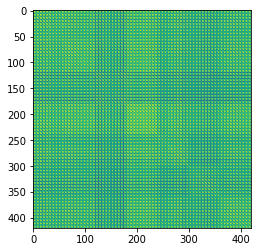

In [144]:
plt.imshow(np.corrcoef(data))

In [203]:
ofdir = './stimuli_normed_cb_rand_crop'
files = [os.path.join(ofdir,file) for file in os.listdir(ofdir) if file.endswith('c0.mp4')]
files.sort()
n = len(files)
print(n)
files[0:5]

70


['./stimuli_normed_cb_rand_crop/id1d1_c0.mp4',
 './stimuli_normed_cb_rand_crop/id1d2_c0.mp4',
 './stimuli_normed_cb_rand_crop/id1f1_c0.mp4',
 './stimuli_normed_cb_rand_crop/id1f2_c0.mp4',
 './stimuli_normed_cb_rand_crop/id1h1_c0.mp4']

100%|███████████████████████████████████████████| 70/70 [00:10<00:00,  6.65it/s]


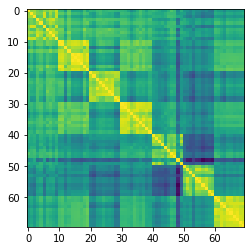

In [209]:
data = np.array([load_video(file)[0,:,:,:].mean(axis=-1).flatten()[::10] for file in tqdm(files)])
plt.imshow(np.corrcoef(data))

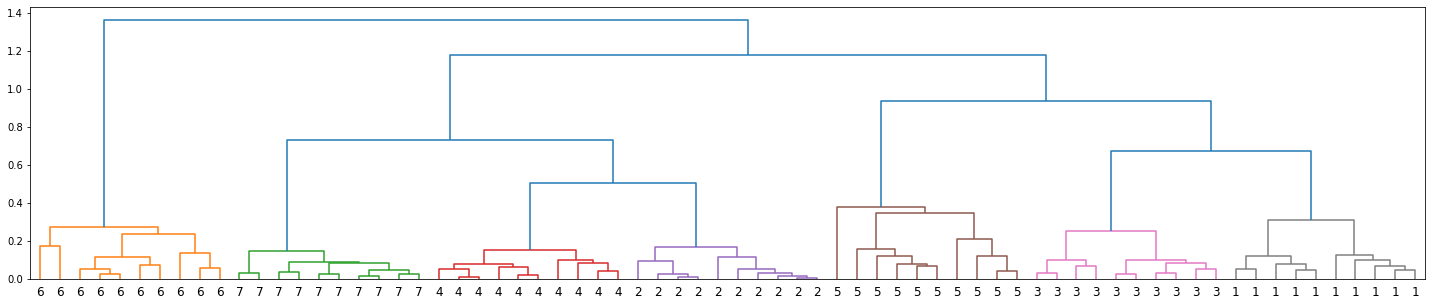

In [210]:
Y = 1-get_triu(np.corrcoef(data))
Z = linkage(Y,'ward')
lbls = [file.split('/')[-1].replace('.mp4','')[2] for file in files]
plt.figure(figsize=(25,5))
dendrogram(Z,0,labels=lbls,orientation='top',leaf_font_size=12,color_threshold=.5,leaf_rotation=0);

In [206]:
np.arange(0,151,50)

array([  0,  50, 100, 150])

100%|███████████████████████████████████████████| 70/70 [00:09<00:00,  7.05it/s]


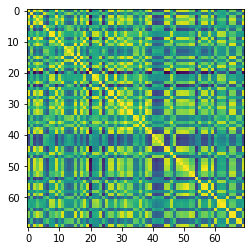

In [207]:
import random
data_r = np.array([load_video(file.replace('_c0.mp4',f'_c{random.choice(np.arange(0,151,50))}.mp4'))[0,:,:,:].mean(axis=-1).flatten()[::10] for file in tqdm(files)])
plt.imshow(np.corrcoef(data_r))

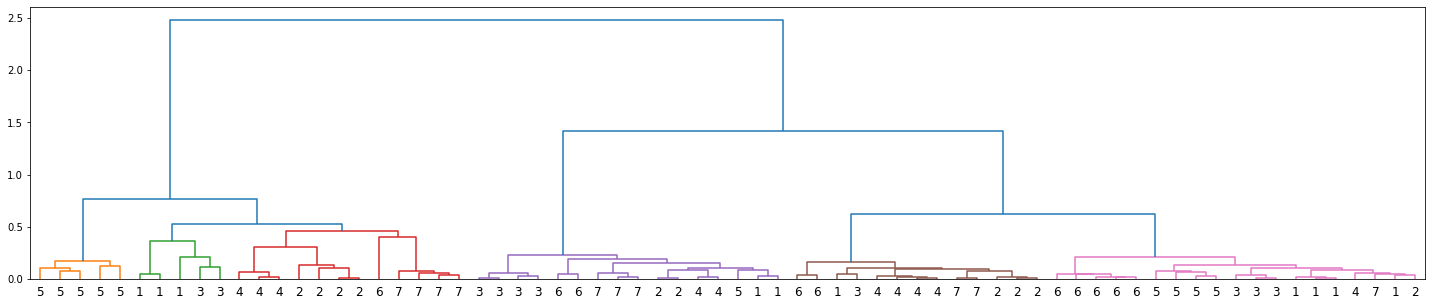

In [208]:
Y = 1-get_triu(np.corrcoef(data_r))
Z = linkage(Y,'ward')
lbls = [file.split('/')[-1].replace('.mp4','')[2] for file in files]
plt.figure(figsize=(25,5))
dendrogram(Z,0,labels=lbls,orientation='top',leaf_font_size=12,color_threshold=.5,leaf_rotation=0);

In [212]:
np.corrcoef(get_triu(np.corrcoef(data_r)),get_triu(np.corrcoef(data)))[0,1]

0.13912505592989852

In [180]:
np.corrcoef(get_triu(np.corrcoef(data_r)),get_triu(np.corrcoef(data)))[0,1]

0.1806194515967653

In [ ]:
# def get_flows(videodata):
    
#     import cv2
    
#     nframes = videodata.shape[0]
#     nframes = videodata.shape[0]
#     flows = []
#     idx_i = np.arange(0,nframes-1)
#     idx_j = np.arange(1,nframes)
#     for i in range(len(idx_i)):
#             frame1 = videodata[idx_i[i],:,:,:].mean(axis=-1).astype(np.int8)
#             frame2 = videodata[idx_j[j],:,:,:].mean(axis=-1).astype(np.int8)
#             flow = cv2.calcOpticalFlowFarneback(frame1, frame2, None, pyr_scale = 0.5, levels = 5, winsize = 11, iterations = 5, poly_n = 5, poly_sigma = 1.1, flags = 0)
#             flows.append(flow)
            
#     return np.array(flows)

In [ ]:
# def get_flow_SS(flows):
#     return ((flows-flows.mean(axis=0))**2).sum(axis=0).mean(axis=-1)

In [ ]:
# def get_magnitude(flows):
#     mags = np.array([cv2.cartToPolar(flows[i,:,:,0],flows[i,:,:,1])[0] for i in range(flows.shape[0])])
#     return mags.mean(axis=0)

In [ ]:
# files = [os.path.join(indir,file) for file in os.listdir(indir) if file.endswith('.mp4')]
# file = files[0]
# videodata = load_video(file)

In [ ]:
# #flows_SS = [get_magnitude(get_flows(load_video(file))) for file in tqdm(files)]
# flows_SS = [get_flow_SS(get_flows(load_video(file))) for file in tqdm(files)]

In [ ]:
# flows_SS[0].shape

In [ ]:
# flows_flat = np.array([np.array(flows_SS)[i,:,:].flatten() for i in range(np.array(flows_SS).shape[0])])
# flows_flat.shape

In [ ]:
# plt.imshow(np.corrcoef(flows_flat))

In [ ]:
# Y = 1-get_triu(np.corrcoef(flows_flat))
# Z = linkage(Y,'ward')
# lbls = [file.split('/')[-1].replace('.mp4','')[2:4] for file in files]
# plt.figure(figsize=(25,5))
# dendrogram(Z,0,labels=lbls,orientation='top',leaf_font_size=12,color_threshold=.5,leaf_rotation=0);